#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

#### Data import

In [46]:
import csv
filename = './GRU-32-new/Experiment-10.csv'
with open(filename) as csvdatei:
    csv_reader_object = csv.reader(csvdatei)
    row = list(csv_reader_object)
print('Half pole length : ', row[15])
print('Recorded data: ', row[27])

data = np.genfromtxt(filename, skip_header=28, delimiter=',')

Half pole length :  ['# L: 0.395']
Recorded data:  ['time', 'angle', 'angleD', 'angleDD', 'angle_cos', 'angle_sin', 'position', 'positionD', 'positionDD', 'Q', 'u', 'target_position', 'pole_length']


#### Plotting

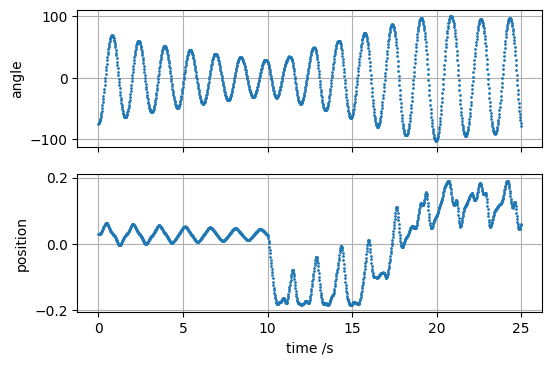

In [47]:
time = data[:, 0]
angle = data[:, 1]*180/np.pi
position = data[:, 6]

f = lambda x: np.sign(x)*180 - x
angle = f(angle)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, dpi =100)

ax1.plot(time, angle,'.',markersize=2)
ax1.set(ylabel='angle')
ax1.grid(True)

ax2.plot(time, position,'.',markersize=2, label='')
ax2.set(ylabel='position', xlabel='time /s')
ax2.grid(True)

### Fourier Analysis

In [164]:
data2 = np.genfromtxt('Experiment-1.csv', skip_header=28, delimiter=',')
time2 = data2[:, 0]
angle2 = data2[:, 1]*180/np.pi
f = lambda x: np.sign(x)*180 - x
angle2 = f(angle2)

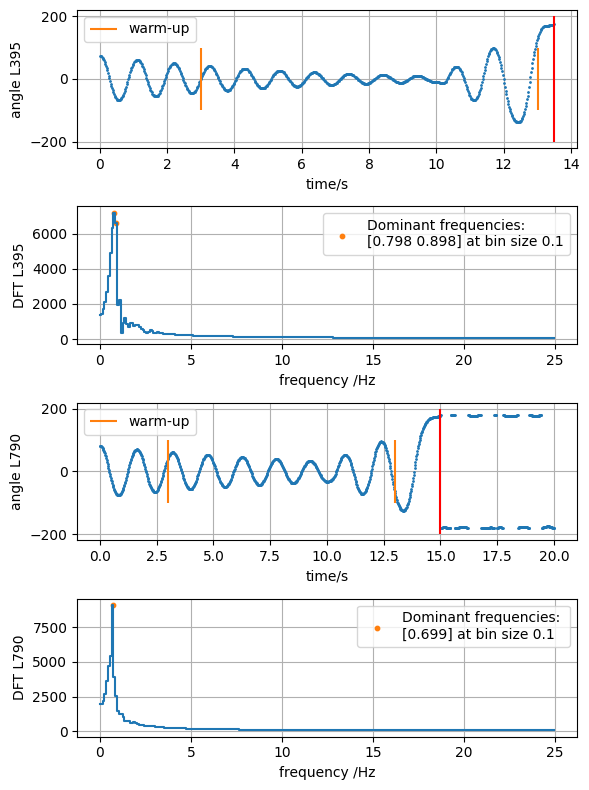

In [168]:
begin = 150
end = begin + 501

fft = rfft(angle[begin:end])
freq = rfftfreq(len(angle[begin:end]), 0.02)
maxima = np.abs(fft) > np.max(np.abs(fft)) - np.max(np.abs(fft))/10  # top 10 per cent
peaks = freq[maxima]
peaks_rounded = np.around(peaks, 3)

fig, axs = plt.subplots(4, dpi=100, figsize=(6, 8))
axs[0].plot(time, angle, marker='.', linestyle='', markersize=2)
axs[0].set(xlabel='time/s', ylabel='angle L395')
axs[0].vlines(begin*0.02,-100,100,color='tab:orange', label='warm-up')
axs[0].vlines(end*0.02,-100,100,color='tab:orange')
axs[0].vlines(13.5,-200,200,color='red')
axs[0].grid(True)
axs[0].legend()

axs[1].step(freq, np.abs(fft), where='mid')
axs[1].scatter(peaks, np.abs(fft[maxima]), s=10, color='tab:orange',
                    label='Dominant frequencies: \n' + str(peaks_rounded) + ' at bin size ' + str(np.around(freq[1], 3)))
axs[1].set(ylabel='DFT L395', xlabel='frequency /Hz')
axs[1].grid(True)
axs[1].legend()

fft2 = rfft(angle2[begin:end])
freq2 = rfftfreq(len(angle2[begin:end]), 0.02)
maxima2 = np.abs(fft2) > np.max(np.abs(fft2)) - np.max(np.abs(fft2))/10  # top 10 per cent
peaks2 = freq2[maxima2]
peaks2_rounded = np.around(peaks2, 3)

axs[2].plot(time2, angle2, marker='.', linestyle='', markersize=2)
axs[2].set(xlabel='time/s', ylabel='angle L790')
axs[2].vlines(begin*0.02,-100,100,color='tab:orange', label='warm-up')
axs[2].vlines(end*0.02,-100,100,color='tab:orange')
axs[2].vlines(15,-200,200,color='red')
axs[2].grid(True)
axs[2].legend()

axs[3].step(freq2, np.abs(fft2), where='mid')
axs[3].scatter(peaks2, np.abs(fft2[maxima2]), s=10, color='tab:orange',
                    label='Dominant frequencies: \n' + str(peaks2_rounded) + ' at bin size ' + str(np.around(freq2[1], 3)))
axs[3].set(ylabel='DFT L790', xlabel='frequency /Hz')
axs[3].grid(True)
axs[3].legend()

fig.tight_layout()
#fig.savefig('swing_training angle DCT Plot2.png')
plt.show()

In [32]:
def multiple_fourier(title, angle_plot=False, save=False, dpi=100, file_start=0, file_end=4):
    # create Experiment file names
    if file_start == 0:
        experiments = ['/Experiment (2).csv']
        file_start += 1
    else:
        experiments = []
    for m in range(file_start, file_end + 1):
            experiments.append('/Experiment-' + str(m) + ' (2).csv')

    fig, axs = plt.subplots(len(experiments), sharex=True, sharey=True, figsize=(6,8), dpi=dpi)
    peak_average = 0
    for i, file in enumerate(experiments):
        filename = './Fouriertransforms/new_training/Swing-Training/' + file
        if angle_plot:
            data = np.genfromtxt(filename, skip_header=28, delimiter=',')
        else:
            data = np.genfromtxt(filename, skip_header=28, delimiter=',')[:501]
        time = data[:, 0]
        angle = data[:, 1] * 180 / np.pi
        f = lambda x: np.sign(x)*180 - x
        angle = f(angle)
        fft = rfft(angle)
        freq = rfftfreq(len(angle), 0.02)
        maxima = np.abs(fft) > np.max(np.abs(fft)) - np.max(np.abs(fft))/5  # top 20 per cent
        peaks = freq[maxima]
        peaks_rounded = np.around(peaks, 3)
        peak_average += np.mean(peaks)
        
        if angle_plot:
            axs[i].plot(time, angle, marker='.', linestyle='', markersize=2)
            axs[i].set(ylabel='Run ' + str(i + 1), xlabel='time /s')
            axs[i].grid(True)
        
        else:
            axs[i].step(freq, np.abs(fft), where='mid')
            axs[i].scatter(peaks, np.abs(fft[maxima]), s=10, color='tab:orange',
                        label='Dominant frequencies: \n' + str(peaks_rounded) + ' at bin size ' + str(np.around(freq[1], 3)))
            axs[i].set(ylabel='Run ' + str(i + 1), xlabel='frequency /Hz')
            axs[i].grid(True)
            axs[i].legend()
        
    if angle_plot:
        fig.suptitle(title)
    else:
        peak_average = np.around(peak_average/len(experiments), 3)
        fig.suptitle(title + '\n Average Frequency: ' + str(peak_average))

    fig.tight_layout()
    if save:
        fig.savefig('./Fouriertransforms/new_training/' + title + '.png')
    plt.show()

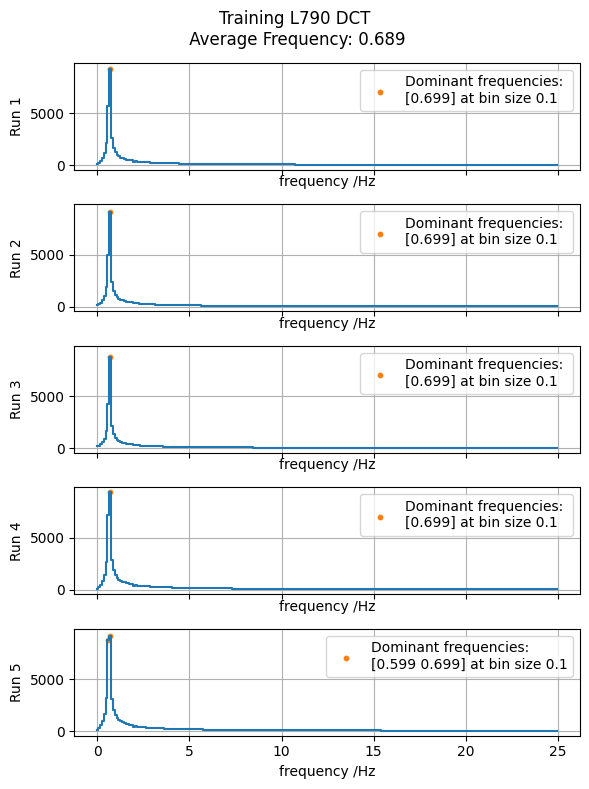

In [35]:
multiple_fourier("Training L790 DCT", angle_plot=False, save=False, dpi = 100)

### Sine example

Dominant frequencies: [1.] at bin size  0.1
Actual frequency:  1.0


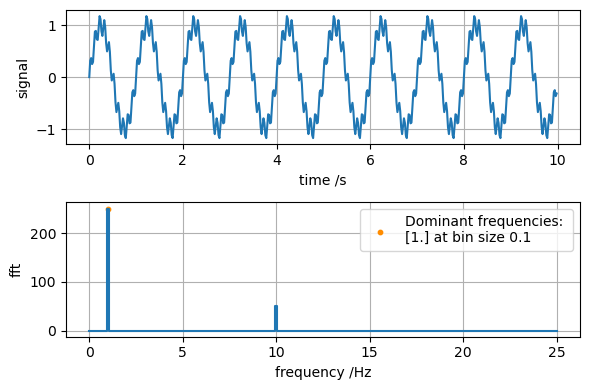

In [ ]:
from scipy.fft import rfft, rfftfreq
L = 1
sampling_length = 10 #s
sample_spacing = 0.02 #s
sampling_frequency = 1/sample_spacing #1/s
N = int(sampling_frequency * sampling_length)

x = np.arange(0, sampling_length, step = sample_spacing)
sine = np.sin(x*2*np.pi/L) + 0.2 * np.sin(x*2*np.pi/(L/10))
fft = rfft(sine)
#freq = np.arange(0, sampling_frequency/2 + 1/sampling_length, 1/sampling_length)
freq = rfftfreq(N, sample_spacing)

max = np.abs(fft) > 100
peaks = freq[max]
print('Dominant frequencies:', peaks, 'at bin size ', 1/sampling_length)
print('Actual frequency: ', 1/L)

fig, (ax1, ax2) = plt.subplots(2, dpi =100, figsize=(6,4))
ax1.plot(x, sine)
ax1.set(ylabel='signal', xlabel='time /s')
ax1.grid(True)

ax2.step(freq, np.abs(fft), where='mid')
ax2.scatter(peaks, np.abs(fft[max]), s = 10, label='Dominant frequencies: \n' + str(peaks) + ' at bin size ' + str(freq[1]), color ='darkorange')
#ax2.set_xticks(peaks)
#ax2.vlines(peaks, 0,250, color = 'red')
ax2.set(ylabel='fft', xlabel='frequency /Hz')
ax2.legend()
ax2.grid(True)
fig.tight_layout()